## Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

## Explore Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. The data for this project is inspired by real data, but is mostly fictional.

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- `category` - the category of taxonomy for each species
- `scientific_name` - the scientific name of each species
- `common_names` - the common names of each species
- `conservation_status` - the species conservation status

The `observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- `scientific_name` - the scientific name of each species
- `park_name` - the name of the national park
- `observations` - the number of observations in the past 7 days


In [70]:
# Import the libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

%matplotlib inline

In [48]:
# Load in the dataset and get a preview
species = pd.read_csv("species_info.csv", encoding="utf-8")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [49]:
# Load in the dataset and get a preview
observations = pd.read_csv("observations.csv", encoding="utf-8")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [50]:
# Get data characteristics
print(f"Species shape: {species.shape}")
print(f"Observations shape: {observations.shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)


In [51]:
# Get distinct species
print(f"Number of species: {species.scientific_name.nunique()}")

# Get unique categories of species
print(f"Number of categories: {species.category.nunique()}")
print(f"Categories: {species.category.unique()}")

# Get the count of categories
species.groupby("category").size()

Number of species: 5541
Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [52]:
# Explore conservation status groups
print(f"Number of conservation statuses: {species.conservation_status.nunique()}")
print(f"Unique conservation statuses: {species.conservation_status.unique()}")

Number of conservation statuses: 4
Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [53]:

# Get the count of conservation status groups
print(species.groupby("conservation_status").size())
print(f"NaN values: {species.conservation_status.isna().sum()}")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
NaN values: 5633


There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [69]:
# Get distinct observations
print(f"Number of parks: {observations.park_name.nunique()}")
print(f"Unique parks: {observations.park_name.unique()}")

# Get the number of observations
print(f"Number of observations: {observations.observations.sum()}")

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of observations: 3314739


## Analyze Data
This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [55]:
# Fill in NaN values with a new status
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. 

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [56]:
conservation_category = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

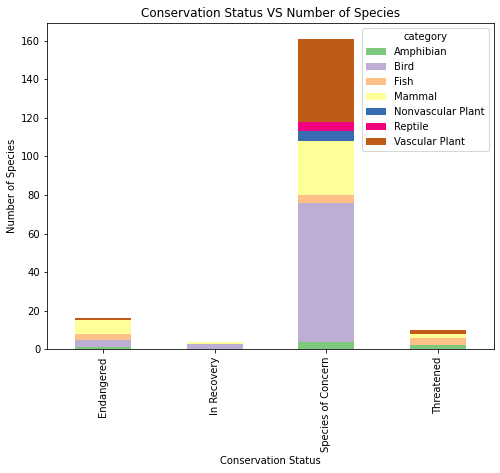

In [67]:
sns.set_palette("Accent")
ax = conservation_category.plot(kind = "bar", figsize=(8,6), stacked=True)
plt.title("Conservation Status VS Number of Species")
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [58]:
species["is_protected"] = species.conservation_status != "No Intervention"
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Once the new column is created, we can group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [59]:
category_counts = species.groupby(["category", "is_protected"])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns="is_protected", index="category", values="scientific_name")\
                        .reset_index()
category_counts.columns = ["category", "not_protected", "protected"]
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds.

In [62]:
category_counts["percent_protected"] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Significance
This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, we'll need to create a contingency table. 

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [72]:
# Create a contingency table for mammals vs. birds
contingency1 = [[30, 146], [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with reptiles. 

In [73]:
# Create a contingency table for mammals vs. reptiles
contingency2 = [[30, 146], [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))